In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = os.getcwd()
files = os.listdir(path)
files

['.ipynb_checkpoints',
 'machine_0.csv',
 'machine_1.csv',
 'machine_10.csv',
 'machine_11.csv',
 'machine_12.csv',
 'machine_13.csv',
 'machine_14.csv',
 'machine_15.csv',
 'machine_16.csv',
 'machine_17.csv',
 'machine_18.csv',
 'machine_19.csv',
 'machine_2.csv',
 'machine_3.csv',
 'machine_4.csv',
 'machine_5.csv',
 'machine_6.csv',
 'machine_7.csv',
 'machine_8.csv',
 'machine_9.csv',
 'Tagup challenge.ipynb',
 'Untitled.ipynb']

In [68]:
#Importing all csv files in to a list.
train=[]
files_xls = [f for f in files if f[-3:] == 'csv']
for f in files_xls:
    data = pd.read_csv(f, 'Sheet1',delimiter=',')
    dataarray = np.array(data.iloc[:,1:])
    train.append(dataarray)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


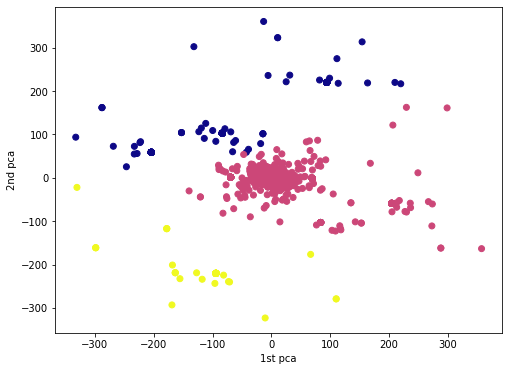

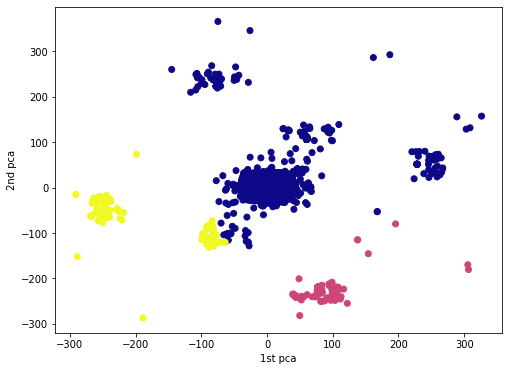

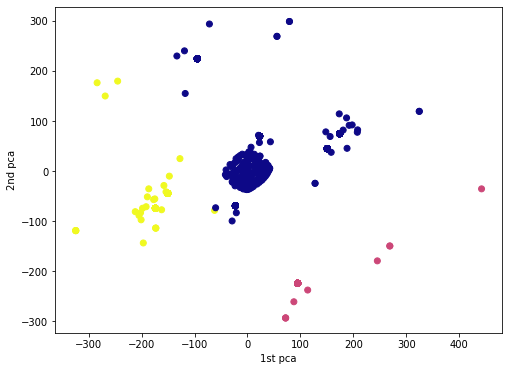

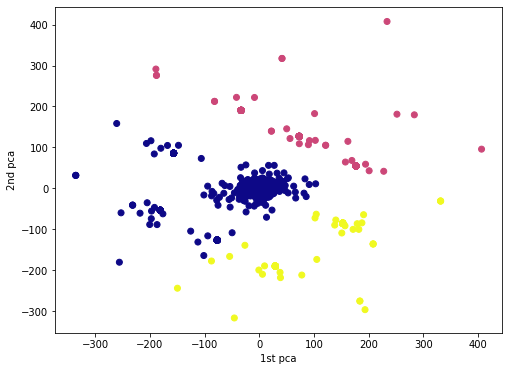

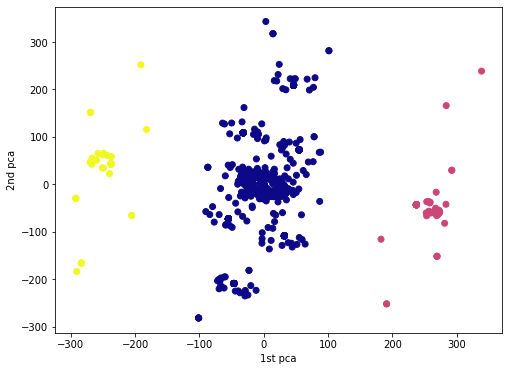

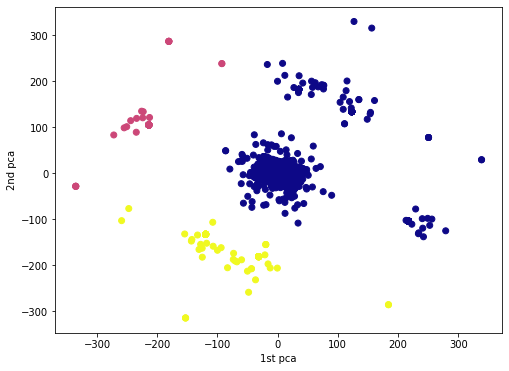

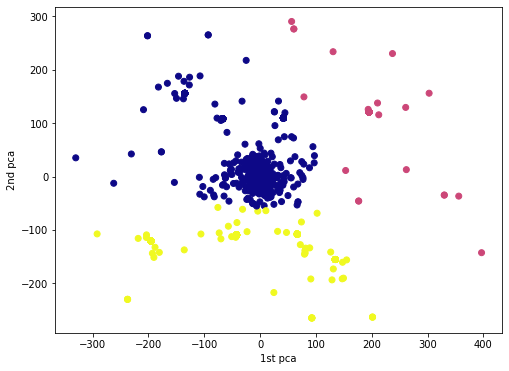

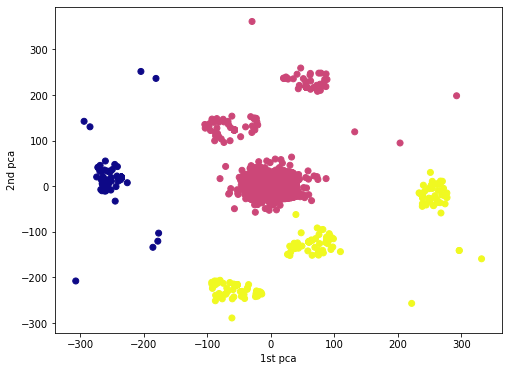

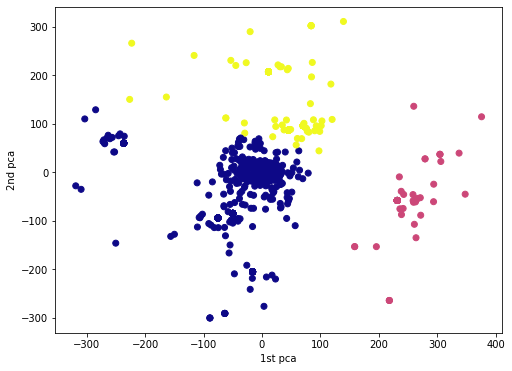

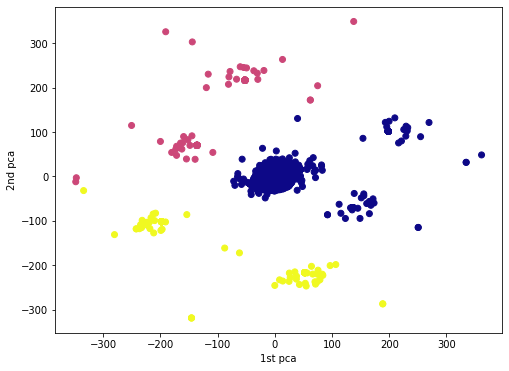

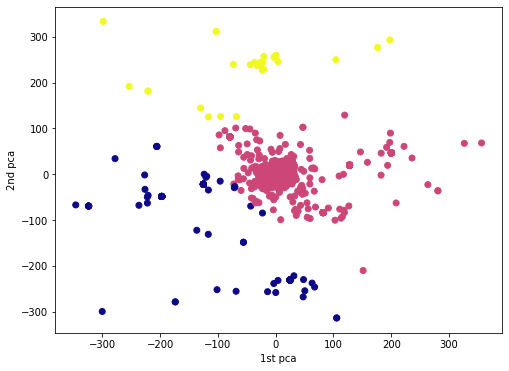

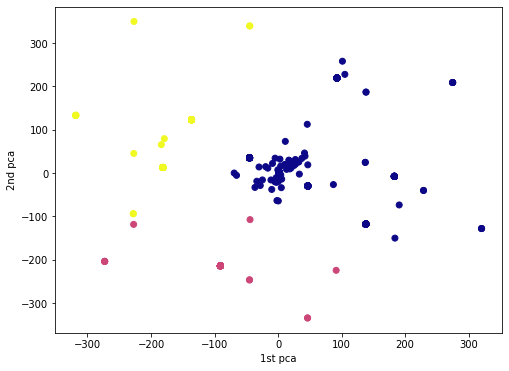

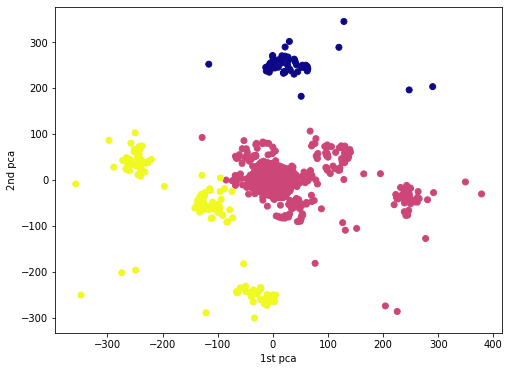

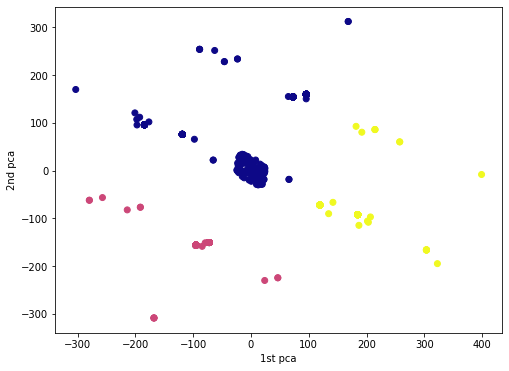

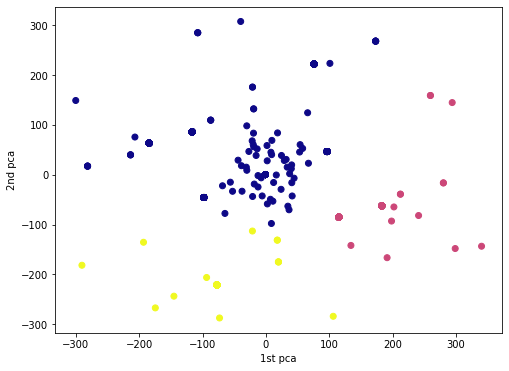

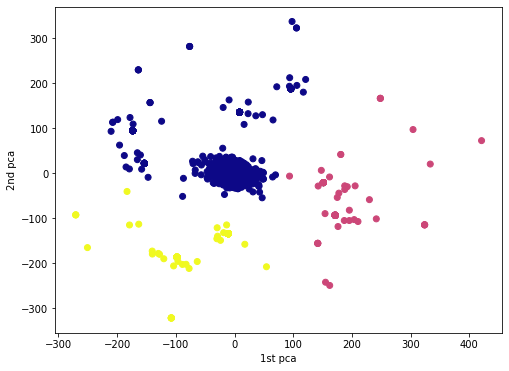

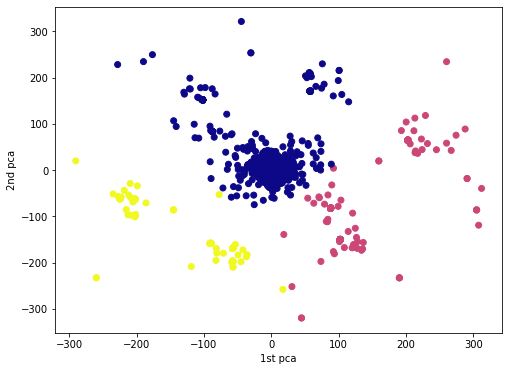

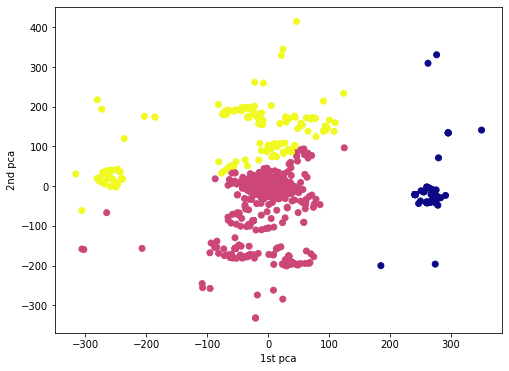

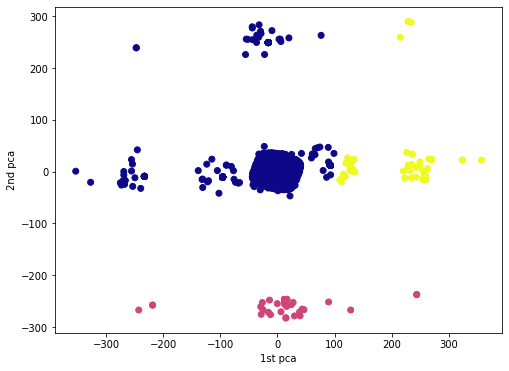

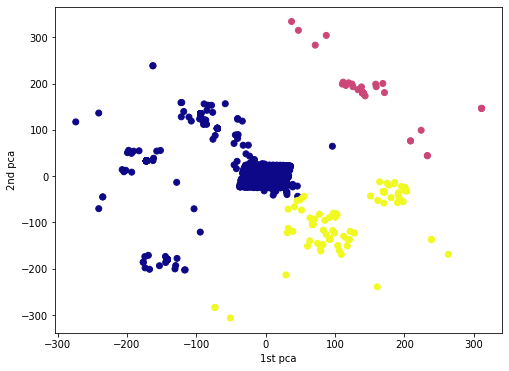

In [251]:
from sklearn.decomposition import PCA
scaled_data=[]
for i in range(0,20):
    pca = PCA(n_components=2)
    pca.fit(train[i])
    data_pca=pca.transform(train[i])
    scaled_data.append(data_pca)
    plt.figure(figsize=(8,6))
    
    plt.scatter(data_pca[:,0],data_pca[:,1],c=label[i],cmap='plasma')
    plt.xlabel('1st pca')
    plt.ylabel('2nd pca')
    print(i)
        
        
        

In [250]:
# Implementing Unsupervised learning algorithm for labels 
label = []
for i in scaled_data:
    from sklearn import preprocessing
    from sklearn.cluster import KMeans
    #nor=preprocessing.StandardScaler()
    #X1=nor.fit_transform(i)
    k_m = KMeans(n_clusters=3)
    target = np.array(k_m.fit(i))
    label.append(k_m.labels_)

Text(0, 0.5, 'second sensor')

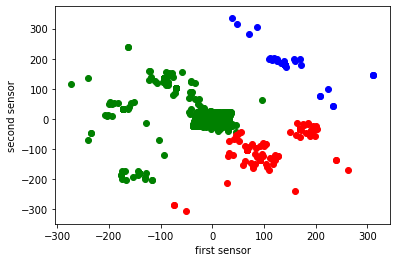

In [264]:
# How our current data pattern  
# Green is for machine working good status
# Blue for faulty mode
# Red for failure mode

df1=pd.DataFrame(data_with_labels[19])
df11 = df1[df1.y==0]
df22 =df1[df1.y==1]
df33 = df1[df1.y==2]
plt.scatter(df11['pca1'],df11['pca2'],color='green',)
plt.scatter(df22['pca1'],df22['pca2'],color='blue')
plt.scatter(df33['pca1'],df33['pca2'],color='red')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

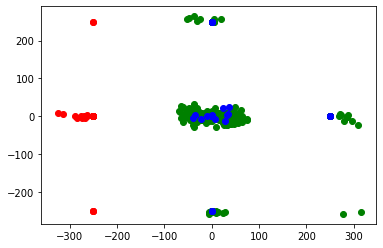

In [22]:
# How our data looks without using PCA just using K-means.
#Sample to show results will vary when ever we use different method of noise cleaning method.



#df1=pd.DataFrame(data_with_labels[0])
#df11 = df1[df1.y==0]
#df22 =df1[df1.y==1]
#df33 = df1[df1.y==2]
#plt.scatter(df11['first'],df11['second'],color='green')
#plt.scatter(df22['first'],df22['second'],color='blue')
#plt.scatter(df33['first'],df33['second'],color='red')

In [253]:
# combining the labels to data.
data_with_labels= []
names=['time','first','second','third','fourth']
for k in range(0,20):
    data = pd.DataFrame(scaled_data[k],columns=['pca1','pca2'])
    time_col = pd.read_csv(files_xls[k], 'Sheet1',delimiter=',',names=names,header=None,skiprows=1)
    data['time']=time_col['time']
    
    target_col = pd.DataFrame(label[k],columns=['y'])
    df = data.join(target_col)   
    data_with_labels.append(df)

In [270]:
# getting the faulty & failure mode times.


failure_directory={}
faulty_directory ={}
good_directory={}
for i in range (0,20):
    list_frame = pd.DataFrame(data_with_labels[i])
    good_mode=[]
    failure_mode=[]
    faulty_mode=[]
    for j in range(list_frame['y'].size):
        
        if list_frame['y'][j] == 0:
            
            good_mode.append(list_frame['time'].values[j])
            
        elif list_frame['y'][j] == 1:
            
            faulty_mode.append(list_frame['time'].values[j])
        
        elif list_frame['y'][j] == 2:
        
            failure_mode.append(list_frame['time'].values[j])
            
    faulty_directory['machine'+str(i)] = faulty_mode
    good_directory['machine'+str(i)] = good_mode
    failure_directory['machine'+str(i)] = failure_mode       

In [272]:
good_directory.keys()

dict_keys(['machine0', 'machine1', 'machine2', 'machine3', 'machine4', 'machine5', 'machine6', 'machine7', 'machine8', 'machine9', 'machine10', 'machine11', 'machine12', 'machine13', 'machine14', 'machine15', 'machine16', 'machine17', 'machine18', 'machine19'])

In [269]:
# Running Prediction models, this can be implemeted to classify live for workers to be alert on faulty mode.


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report    
for i in range(0,20):
    X1= pd.DataFrame(train[i])
    y = pd.DataFrame(label[i])
    nor=preprocessing.StandardScaler()
    X1=nor.fit_transform(X1)
    X = pd.DataFrame(X1)
    X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(),test_size=0.1,stratify = y)
#from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import LogisticRegression
    model1 = LogisticRegression(max_iter=10000, solver='lbfgs',multi_class = 'auto')
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
# Random Forest
    from sklearn.ensemble import RandomForestClassifier
    model2=RandomForestClassifier(class_weight = 'balanced',max_depth=1000,n_estimators=250,min_samples_split=10,criterion='entropy')
    model2.fit(X_train,y_train)
    y_predrf=model2.predict(X_test)
# XGB
    import xgboost as xgs
    model3 = xgs.XGBClassifier(max_depth=3,importance_type='weight')
    model3.fit(X_train,y_train)
    ypred3 = model3.predict(X_test)
# Ensemble
    from sklearn.ensemble import VotingClassifier
    #create a dictionary of our models
    estimators=[('lr', model1),('RF1', model2),('XGB',model3)]
    #create our voting classifier, inputting our models
    model5 = VotingClassifier(estimators, voting='soft')
    #fit model to training data
    model5.fit(X_train,y_train)
    #test our model on the test data
    ypred_en=model5.predict(X_test)
    model5.score(X_test, y_test)
# printing    
    print('machine',i)
    print(confusion_matrix(y_test,ypred_en))
    print(classification_report(y_test,ypred_en))
    
# we can add Deep-learning or any machine learning models to this ensemble learner predictics based on volts give my all models.

machine 0
[[ 21   0   0]
 [  0 272   0]
 [  0   0   7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       272
           2       1.00      1.00      1.00         7

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

machine 1
[[280   0   0]
 [  0   9   0]
 [  0   0  11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

machine 2
[[278   0   0]
 [  0   8   0]
 [  0   0  14]]
              precision    recall  f1-score   support

           0   

machine 19
[[270   0   0]
 [  0   8   0]
 [  0   0  22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       270
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        22

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

